# Exercício 1 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9517697095870972, 1.3707693004093953e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/FirstMixture100000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2
0 -1.170139  0.483535 -0.744470
1 -0.064718 -0.051891  0.586599
2  1.965330 -1.464159  1.032710
3  2.036328 -2.474439 -1.000905
4  1.943326 -1.272134  2.057642


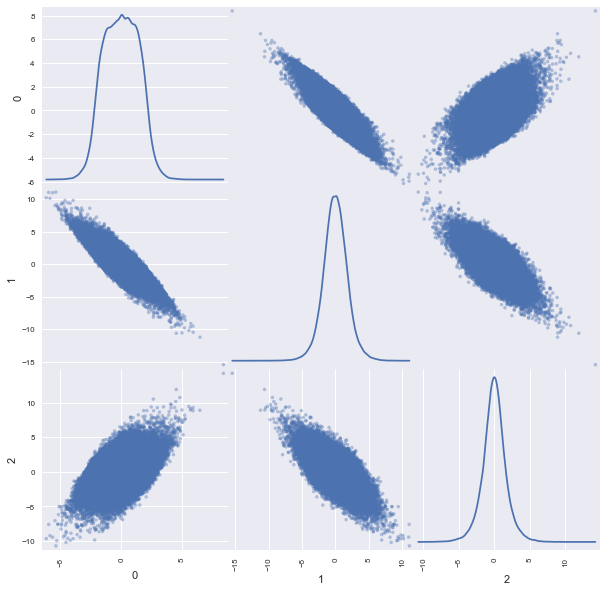

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.2311,0.0902,0.9929,0
1,0.5457,0.6538,0.992,0
2,0.5661,0.7617,0.9818,0


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, beta = 0.9998, runs = 1)

Execution time: 7.4424474239349365 seconds


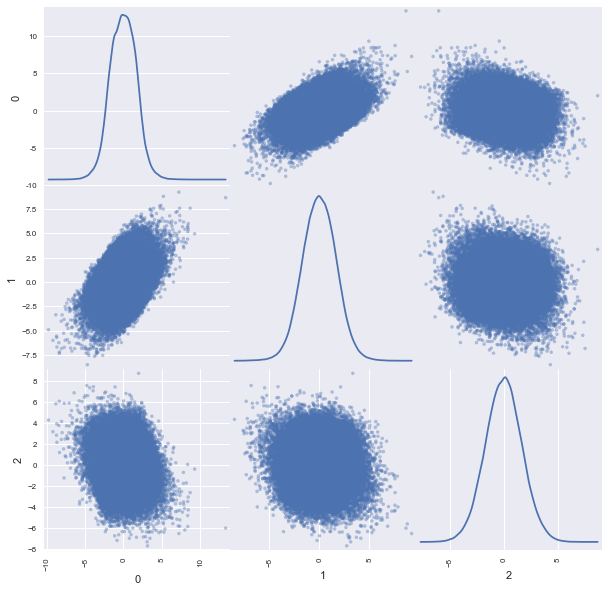

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.4218,0.4035,0.9979,1.2605e-31
1,0.1489,0.0553,0.9991,1.9157e-20
2,0.0723,0.0162,0.9999,2.6648e-05


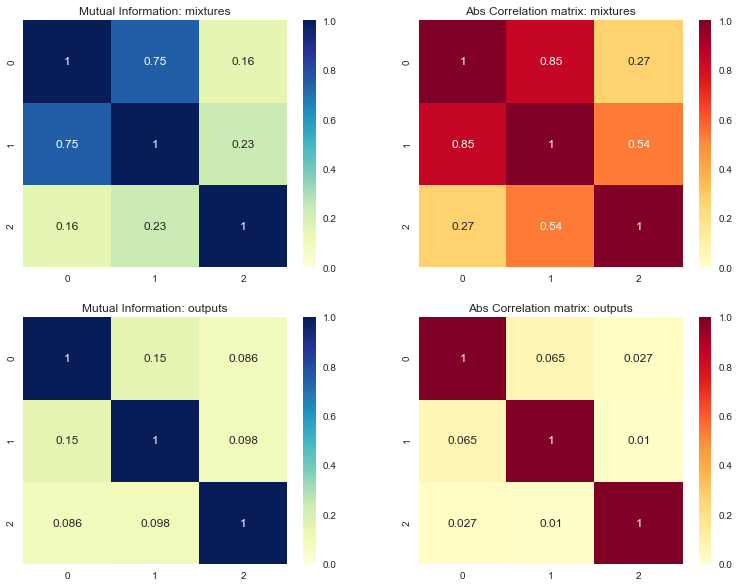

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures[-1000:], y = yNPCA[-1000:], KDE = False)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, runs  = 1) 

Execution time: 10.39732575416565 seconds


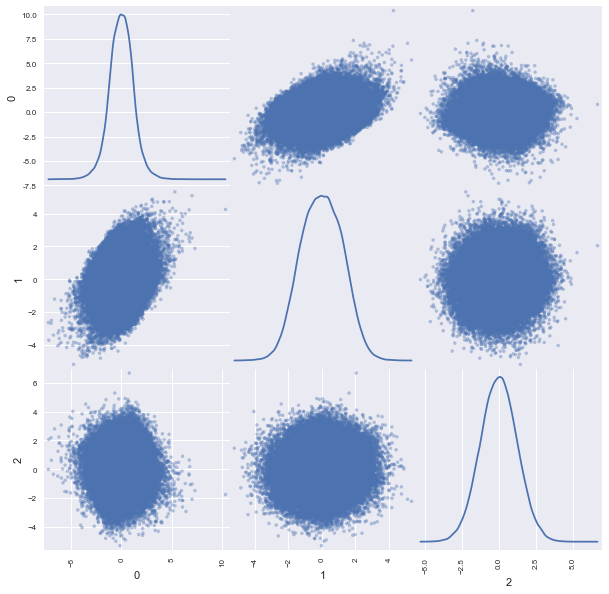

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.5824,0.5577,0.9931,0
1,0.0594,0.0174,0.9985,7.3228e-27
2,0.0801,0.209,1,0.4124


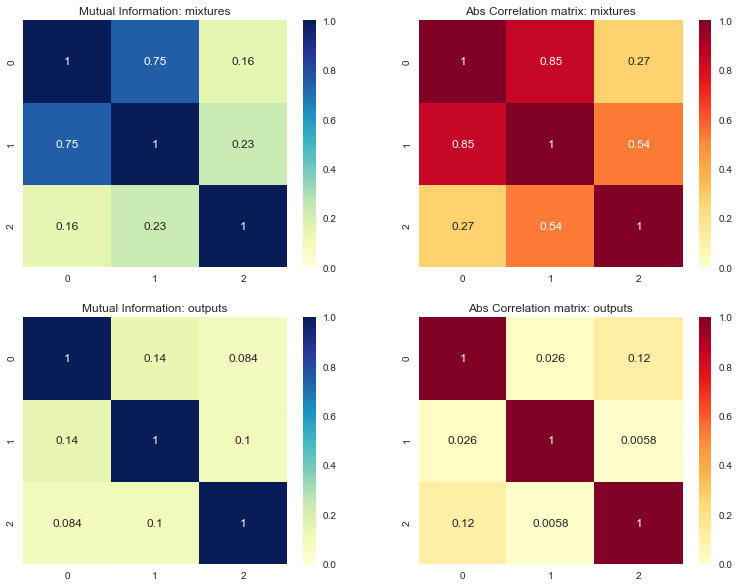

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures[-1000:], y = yFeedback[-1000:], KDE = False)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-9, runs = 1)

Execution time: 6.906382322311401 seconds


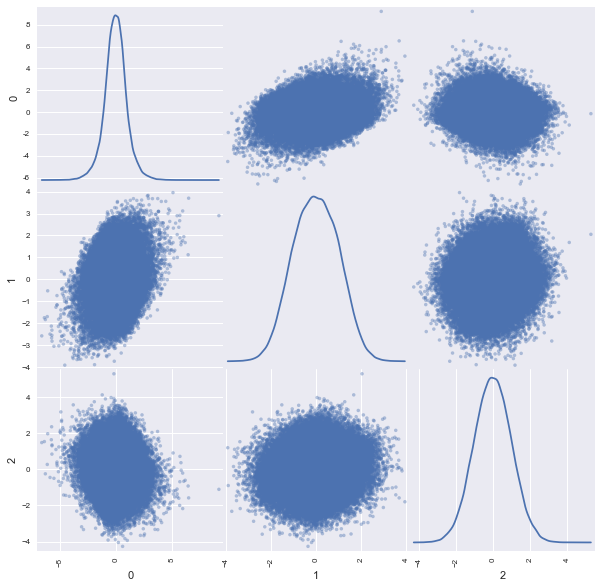

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.5614,0.7145,0.9851,0
1,0,0.1391,0.9984,8.3234e-28
2,0.1389,0.57,1,0.17218


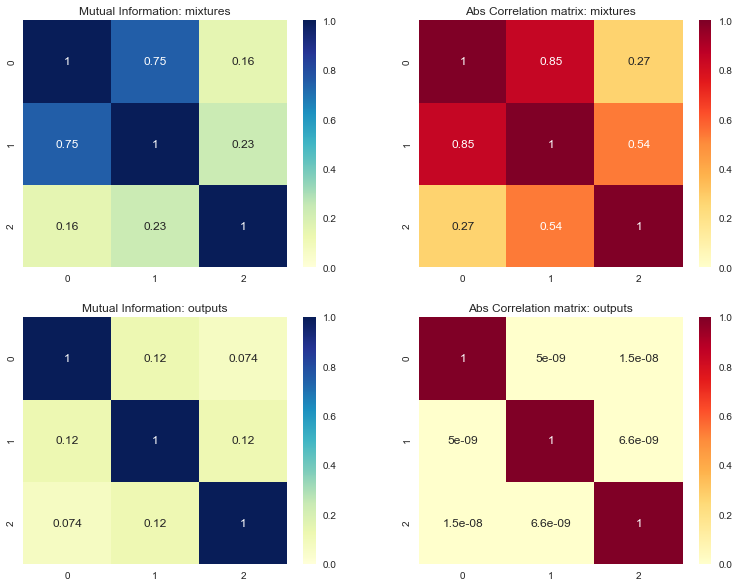

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures[-1000:], y = yFeedforward[-1000:], KDE = False)

# Fontes conhecidas

In [18]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/FirstSource100000Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(3, 100000)


,0,1,2
0,-1.170139,0.483535,-0.744470
1,-0.064718,-0.051891,0.586599
2,1.965330,-1.464159,1.032710
3,2.036328,-2.474439,-1.000905
4,1.943326,-1.272134,2.057642


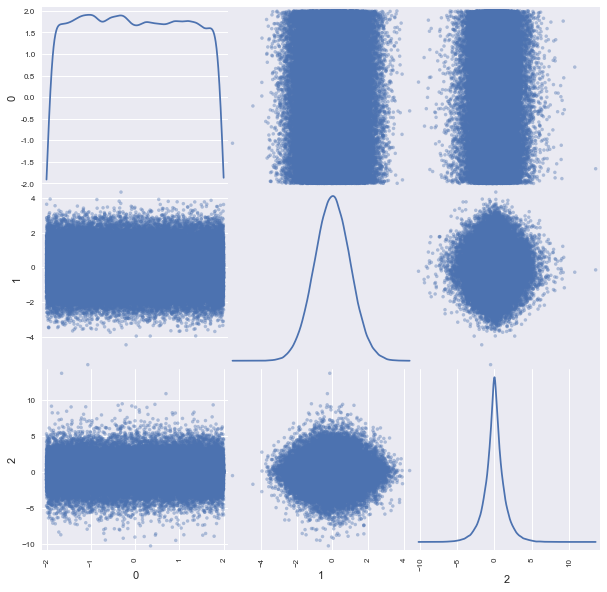

In [19]:
scatter_matrix(distDataFrameSources.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

## NPCA-RLS

(3, 100000) (3, 100000)
[[ 5.74966763  3.10027551  2.99068756]
 [ 2.03475112  0.41473178  0.43968788]
 [ 0.12715604  0.37614473  0.36291814]]


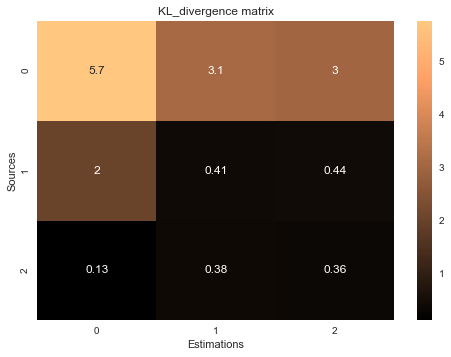

KeyboardInterrupt: 

In [20]:
from evaluation   import KLmatrix, MImatrix
KLmatrix(distDataFrameSources.values,yNPCA)
MImatrix(distDataFrameSources.values,yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

In [ ]:
KLmatrix(distDataFrameSources.values,yFeedback)
MImatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

In [ ]:
KLmatrix(distDataFrameSources.values,yFeedforward)
MImatrix(distDataFrameSources.values,yFeedforward)